# Bloque 3. Actividad 2. Búsqueda (continuación)

|||
|-|-|
|**Alumno**|Ángel García Alcántara<br><angelgarcan@gmail.com>|
|**Materia**|Recuperación de información<br>en Bases de datos no estructuradas<br>Cuarto Semestre|
|**Fecha**|16 de marzo de 2020|

Crear un índice invertido con pesado TFIDF, implemente podado de listas de posteo y mida el impacto del podado.

Instrucciones:

* Utilice el archivo de tweets de las elecciones 2018 como fuente de datos, contiene 100 mil tweets (cada linea es un json valido, el archivo esta comprimido con gzip).
* Modele su texto como una bolsa de palabras (realice las normalizaciones que juzgue necesarias)
    * Cree un índice sobre el campo "text"
    * Construya el índice invertido
    * Realice el siguiente experimento
        * Seleccione de manera aleatoria 1000 documentos y uselos como consultas
        * Realice la operación de poda de listas de posteo para diferentes longitudes máximas, en particular, pruebe para 50, 100, 150, 200
        * Mida el tiempo de consulta de las 1000 consultas, para cada tamaño de poda
        * Plotee los histogramas de la similitud coseno, para cada tamaño de poda; trabaje con datos agregados para las 1000 consultas
        * Mida la cantidad de memoria después de cada poda (puede guardar la estructura mediante el modulo  pickle  de Python, o si se le facilita, puede realizar el conteo de enteros y flotantes requeridos.

## INTRODUCCIÓN

### Índice invertido
En informática, un índice invertido es un índice de base de datos que almacena una asignación del contenido, como palabras o números, a sus ubicaciones en una tabla, o en un documento o un conjunto de documentos. El propósito de un índice invertido es permitir búsquedas rápidas de texto completo, a un costo de mayor procesamiento cuando se agrega un documento a la base de datos. Es la estructura de datos más popular utilizada en los sistemas de recuperación de documentos. Además, varios sistemas importantes de administración de bases de datos basados en mainframes de uso general han utilizado arquitecturas de listas invertidas.

Hay dos variantes principales de índices invertidos: un índice invertido a nivel de registro contiene una lista de referencias a documentos para cada palabra. Un índice invertido a nivel de palabra contiene adicionalmente las posiciones de cada palabra dentro de un documento. La última forma ofrece más funcionalidad (como búsquedas de frases) pero necesita más potencia de procesamiento y espacio para ser creada.

### Boolean Retrieval
El modelo booleano (estándar) de recuperación de información (BIR) es un modelo clásico de recuperación de información y, al mismo tiempo, el primero y más adoptado. Es utilizado por muchos sistemas de IR hasta el día de hoy. El BIR se basa en la lógica booleana y la teoría clásica de conjuntos, ya que tanto los documentos a buscar como la consulta del usuario se conciben como conjuntos de términos. La recuperación se basa en si los documentos contienen o no los términos de la consulta.

Ventajas:
* Formalismo limpio
* Fácil de implementar
* Concepto intuitivo

Desventajas
* La coincidencia exacta puede recuperar muy pocos o demasiados documentos
* Difícil traducir una consulta a una expresión booleana
* Todos los términos están igualmente ponderados
* Más como recuperación de datos que recuperación de información

### TF-IDF
TF-IDF significa "Frecuencia de término - Frecuencia de documento inversa". Esta es una técnica para cuantificar una palabra en documentos, generalmente calculamos un peso para cada palabra que significa la importancia de la palabra en el documento y el corpus. Este método es una técnica ampliamente utilizada en recuperación de información y minería de texto.

\begin{equation}
TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
\end{equation}

Al tomar las fórmulas de TF e IDF, obtenemos la puntuación TF-IDF:

\begin{equation}
\textit{tf-idf(x)}=\textit{tf(t,d)} * \log(\frac{N}{df+1})
\end{equation}

En nuestro caso al usar `TfidfVectorizer` se calcula IDF y TF de la siguiente manera (de la documentación de `sklearn.feature_extraction.text.TfidfVectorizer`):

> La fórmula que se usa para calcular el tf-idf para un término t de un documento d en un conjunto de documentos es tf-idf (t, d) = tf (t, d) * idf (t), y se calcula el idf como idf (t) = log [n / df (t)] + 1 (si smooth_idf = False), donde n es el número total de documentos en el conjunto de documentos y df (t) es la frecuencia de documentos de t; la frecuencia del documento es el número de documentos en el conjunto de documentos que contienen el término t. El efecto de agregar "1" a la idf en la ecuación anterior es que los términos con idf cero, es decir, los términos que aparecen en todos los documentos en un conjunto de entrenamiento, no serán completamente ignorados. (Tenga en cuenta que la fórmula de idf anterior difiere de la notación de libro de texto estándar que define el idf como idf (t) = log [n / (df (t) + 1)]).


### TF. Term Frequency
Esto mide la frecuencia de una palabra en un documento. Esto depende en gran medida de la longitud del documento y de la generalidad de la palabra, por ejemplo, una palabra muy común como "es" puede aparecer varias veces en un documento. Pero si tomamos dos documentos, uno con 100 palabras y otro con 10,000 palabras, hay una alta probabilidad de que la palabra común como "es" pueda estar presente más en el documento redactado de 10,000. Pero no podemos decir que el documento más largo es más importante que el documento más corto. Por esta razón exacta, realizamos la normalización en el valor de frecuencia. Dividimos la frecuencia con el número total de palabras en el documento.

\begin{equation}
\textit{tf(t,d)} = \frac {\textit(count\ of\ t\ in\ d)} {\textit(number\ of\ words\ in\ d)}
\end{equation}

### IDF. Inverse Document Frequency
DF mide la importancia del documento en todo el conjunto de corpus, esto es muy similar al TF. La única diferencia es que TF es un contador de frecuencia para un término t en el documento d, donde como DF es el recuento de ocurrencias del término t en el conjunto de documentos N. En otras palabras, DF es el número de documentos en los que la palabra está presente. Consideramos una ocurrencia si el término consiste en el documento al menos una vez, no necesitamos saber la cantidad de veces que el término está presente.

$$df(t) = occurrence\ of\ t\ in\ documents$$

IDF es el inverso de la frecuencia del documento que mide la relevancia del término t. Cuando calculemos IDF, será muy bajo para las palabras más frecuentes, como las palabras de detención (porque las palabras de detención como "es" están presentes en casi todos los documentos, y N / df dará un valor muy bajo a esa palabra). Esto finalmente da lo que queremos, un peso relativo.

$$idf(t) = \log{\frac{N}{(df + 1)}}$$

## DESARROLLO
Se a desarrollar el código necesario para realizar el trabajo solicitado.

In [1]:
# Multiple outputs per cell in Jupyter 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# # Ocultar In[] y Out[] en cada celda.
# from IPython.core.display import display,HTML
# display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

In [3]:
%%javascript
// Evitar autoscroll.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
from collections import defaultdict
import datetime
import random
import re
from microtc.utils import tweet_iterator
import pickle
import os

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm,trange

### Funciones misceláneas

In [7]:
#################
# MISC
#################

# Imprime el progreso dentro de un ciclo for.
def show_progress(showProgressEach, tx, idx, legend='', ret_string=False):
    if showProgressEach is not None and idx % showProgressEach == 0:
        tx1 = datetime.datetime.now()
        dx = (tx1 - tx).total_seconds()
        label=f"{tx1} :: {dx} - Processing item #{idx} {legend}"
        if ret_string: 
            return tx1,label
        else:
            print(label)
            return tx1,None
    elif ret_string: return tx,None

# Convierte una matriz dispersa en un numpy.array.
def mtxvec2array(mtxvec):
    return np.squeeze(np.asarray(mtxvec.todense()))

# Cuenta el total de elementos no cero en una matriz dispersa triangular.
def count_nonzero_triangular(triangular_mtx):
    nprocs=triangular_mtx.count_nonzero()
    nprocs_diag=np.array([triangular_mtx[i,i] for i in range(triangular_mtx.shape[0])]).nonzero()[0].shape[0]
    nprocs-=nprocs_diag
    nprocs/=2
    nprocs+=nprocs_diag
    return int(nprocs)

### Proceso de limpieza de texto
Consiste en los siguientes pasos:
- Convertir a minúsculas,
- Remover saltos de línea,
- Remover acentos ,
- Reemplazar caracteres raros (ü y ñ),
- Remover URL's,
- Remover signos de puntuación (también números),
- Reemplazar cadenas de carateres repetidos 3 veces o más por solo dos ocurrencias,
- Remover palabras de un solo un caracter, ya que no aportan significado real.

In [8]:
def cleanStr(line):
    # Limpiando texto.
    text = line.lower()
    text = re.sub(r'\n', ' ', text)
    # Acentos.
    text = re.sub(r'á', 'a', text)
    text = re.sub(r'é', 'e', text)
    text = re.sub(r'í', 'i', text)
    text = re.sub(r'ó', 'o', text)
    text = re.sub(r'ú', 'u', text)
    # Caracteres raros.
    text = re.sub(r'ü', 'u', text)
    text = re.sub(r'ñ', 'n', text)
    text = re.sub(r'http[^ ]+', '', text)  # URLs.
#     text = re.sub(r'@[^ ]+', '', text)  # Citas.
#     text = re.sub(r'#[^ ]+', '', text)  # Tags.
    text = re.sub(r'[^a-z ]', ' ', text).strip()  # Signos de puntuación.
    text = re.sub(r'(.)\1\1+', r'\1\1', text)  # Caracteres repetidos 3 veces o más.
    text = re.sub(r' [^ ] ', ' ', text)  # Caracteres huérfanos.
    return text

### Remoción de stopwords
Dado que son palabras que no aportan significado realmente, se eliminan.<br>
El idioma es el español.

In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

def removeStopWords(txtLst):
    new_txtLst = txtLst[:]
    idx = 0
    while idx < len(new_txtLst):
        w = new_txtLst[idx]
        if w in stopwords:
            new_txtLst.remove(w)
        else:
            idx += 1
    return new_txtLst

### Stemming
Se reducen las palabras a su raíz común.

In [12]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

def stemming(txtLst):
    new_txtLst = txtLst[:]
    for idx, w in enumerate(new_txtLst):
        new_txtLst[idx] = stemmer.stem(w)            
    return new_txtLst

### Procesar línea de texto
Se limpia, remueven stopwords, stemming y se devuelven los tokens en formato set o lista.


In [13]:
# Limpia y tokeniza una línea de texto.
def process_line(line, remStopw=True, stemm=True, retSet=False):
    # Limpiando text.
    twTxtLst = cleanStr(line).split()
    if remStopw: twTxtLst = removeStopWords(twTxtLst)
    if stemm: twTxtLst = stemming(twTxtLst)
    if retSet:
        return set(twTxtLst)
    else:
        return twTxtLst

### Índice Invertido

##### Algoritmo y consideraciones
Una vez estudiado el problema y los conceptos asociados de tomaron las siguientes decisiones de diseño del algoritmo:
* <u>Recorrer una sola vez todos los tweets</u>. Dado que consume tiempo de procesamiento considerable se decidió solo hacerlo una vez. Para lograrlo se almacena en memoria y en un archivo `tokenized_docs.pickle` las listas de tokens resultantes de procesar el texto de cada tweet. 
* <u>No almacenar los 100,000 textos de los tweets</u>. No nos interesa tener disponible el texto per se, solo las frecuencias de los términos relativas a cada tweet(documento) y a todos los documentos.
* <u>Computar la matriz de pesos TF-IDF y usarla como fuente de datos</u>. Lo anterior significa que a partir de la matriz dispersa obtenida con `TfidfVectorizer` se obtendrán las listas de posteo y las representaciones BOW de cada documento.
* <u>Representar simplificadamente los vectores BOW de cada documento</u>. Para su rápido acceso se representan y almacenan los vectores de documentos como dos arrays, uno con los índices y otro con los valores. Esto se hace así ya que el vector BOW original tiene demasiados ceros lo cual hace ineficiente su almacenamiento y procesamiento. 
* <u>Normalizar los vectores BOW de los documentos</u>. Se normalizan los vectores documento y se aprovecha este hecho para simplificar el cálculo del producto punto de la fórmula de similitud coseno (véase _"Similitud Coseno. Procesamiento y visualización"_ ).  
* <u>Agregar el peso TF-IDF a las listas de posteo</u>. Las listas de posteo se representan como tuplas con el índice de documento y el score TF-IDF calculado.

A continuación se agrupan programáticamente los métodos relacionados al manejo y procesamiento del índice invertido en la clase `InvertedIdx`:

In [14]:
class InvertedIdx:
    tokenized_docs_filename='tokenized_docs.pickle'
    tokenized_docs=None
    idx_mtx=None
    postlists=None
    docs_norms=[]

    def __init__(self, filename):
        self.filename = filename
    
    def process(self, showProgressEach=None, remStopw=True, stemm=True, replace=False):
        """Procesa todos los tweets, los tokeniza y almacena en un archivo pickle."""
        if self.tokenized_docs:            
            print(f"** Processed. tokenized_docs is already loaded.")
            return
        
        # Si existe el archivo. 
        if os.path.isfile(self.tokenized_docs_filename) and not replace:
            with open(self.tokenized_docs_filename, 'rb') as f:
                self.tokenized_docs= pickle.load(f)   
            print(f"** Processed. {os.path.abspath(self.tokenized_docs_filename)} already exists. tokenized_docs loaded.") 
            return
        
        print(f"** Processing {self.filename} ...")
        self.tokenized_docs=[]
        tx = datetime.datetime.now()
        for idx, tw in enumerate(tweet_iterator(self.filename)):
            show_progress(showProgressEach, tx, idx)
            twTokens = process_line(tw['text'], remStopw, stemm)
            self.tokenized_docs.append(twTokens)
#             if not twTokens:
#                 print(idx, twTokens, tw['text'])

        self.n_tw = idx + 1
        self.docs_range = set(range(1, self.n_tw + 1))
        
        with open(self.tokenized_docs_filename, 'wb') as f:
            pickle.dump(self.tokenized_docs, f)            
        print(f"** Processed {self.n_tw} lines. Saved to {os.path.abspath(self.tokenized_docs_filename)}.")
        
    def compute_mtx(self, n_poda=0):
        """
        Genera la matriz self.idx_mtx que contiene los vectores de cada palabra.
        Almacena la matriz resultante en un archivo pickle.
        """
        if self.idx_mtx is None:
            print("** Computing TF-IDF...")
            tfidf_vectorizer=TfidfVectorizer(use_idf=True,
                                             norm='l2',
                                             analyzer='word',
                                             tokenizer=lambda x: x,
                                             preprocessor=lambda x: x,
                                             token_pattern=None) 
            self.idx_mtx=sp.lil_matrix(tfidf_vectorizer.fit_transform(self.tokenized_docs).T)
            self.corpus=tfidf_vectorizer.get_feature_names()
            print("** Computed TF-IDF Matrix !!!")
        else:            
            print("** TF-IDF Matrix was already computed !!!")
        
        if n_poda != 0:        
            print(f"** Starting poda{n_poda} TF-IDF Matrix...")
            tx = datetime.datetime.now()
            for idx_w,w in enumerate(inv_idx.corpus):
                show_progress(1000, tx, idx_w)
                vd=np.asarray(self.idx_mtx.getrow(idx_w).todense()).flatten()
                cols=vd.argsort()[:-n_poda]
                vd[cols]=0
                self.idx_mtx[idx_w,:]=vd
        
        filename=f"poda{n_poda}_mtx.pickle"
        with open(filename, 'wb') as f:
            pickle.dump(self.idx_mtx, f)
        print(f"** Done poda{n_poda} TF-IDF Matrix !!!")
        print(f"{filename} written.")
            
        return self.idx_mtx

    def compute_plists(self,n_poda=0):
        """
        Computa las listas de posteo para el tamaño de poda n_poda.
        Guarda las listas de posteo en la variable self.postlists.
        Almacena las listas de posteo resultantes en un archivo pickle.
        """
        print(f"** Computing Posting lists with poda{n_poda} ...")
        self.postlists=defaultdict(list)
        tx = datetime.datetime.now()
        for idx_w,w in enumerate(inv_idx.corpus):
            show_progress(10000, tx, idx_w)
            vec=np.asarray(self.idx_mtx.getrow(idx_w).todense()).flatten()
            plen=0
            for idx_v in reversed(vec.argsort()):
                v = vec[idx_v]
                if v == 0 : break
                self.postlists[w].append((idx_v,v))
                plen += 1
                if n_poda != 0 and plen == n_poda: break
        
        filename=f"poda{n_poda}_plist.pickle"
        with open(filename, 'wb') as f:
            pickle.dump(self.postlists, f)
        print(f"{filename} written.")
        print(f"** Computed Posting lists with poda{n_poda} !!!")    
        return self.postlists
    
    def plist_index(self, token):
        """Obtiene solo los índices en los que ocurre el token dado."""
        return [idx for idx,score in self.postlists[token]]
    
    def a(self, q):
        """Realiza la búsqueda AND de todos los tokens q."""
        d = self.docs_range
        for i, word in enumerate(q):
            d = d.intersection(self.plist_index(word))
        return list(sorted(d))

    def o(self, q):
        """Realiza la búsqueda OR de todos los tokens q."""
        d = set()
        for word in q:
            d = d.union(self.plist_index(word))
        return list(sorted(d))

    def getTw(self, n):
        """Obtiene el tweet en la posición n."""
        for idx, tw in enumerate(tweet_iterator(self.filename)):
            if idx == n: return tw;
    
    def getDocs(self, nTweets):
        """Obtiene el(los) documento(s) tokenizado del tweet en la posición n."""
        return [self.tokenized_docs[i] for i in nTweets]

    # ONLY FOR DEBUGGING.
    def printPostlist(self, u, printText=False):
        A = self.sorted_inv_indx[u]
        print(u, len(A), A)
        if printText:
            for idx in A:
                print(idx, inv_idx.getTw(idx)['text'])

In [15]:
# !wc e18_min20.json
!rm -f *.pickle
!ls -l *.pickle

ls: cannot access '*.pickle': No such file or directory


Se crea el objeto que contendrá el índice invertido y se procesa todo el archivo de entrada.

In [18]:
inv_idx = InvertedIdx("data/e18_min1K.json")
inv_idx.process(showProgressEach=10000)

** Processing data/e18_min1K.json ...
2020-05-11 02:51:21.557620 :: 0.000237 - Processing item #0 
** Processed 1000 lines. Saved to /home/jovyan/public/B6_ProyectoIntegrador/tokenized_docs.pickle.


Se procesa la matriz TF-IDF

In [19]:
%%time
inv_idx.compute_mtx()
# pd.DataFrame(inv_idx.idx_mtx.todense(), index=inv_idx.corpus)

** Computing TF-IDF...
** Computed TF-IDF Matrix !!!
** Done poda0 TF-IDF Matrix !!!
poda0_mtx.pickle written.
CPU times: user 122 ms, sys: 16 ms, total: 138 ms
Wall time: 200 ms


<3435x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 8575 stored elements in List of Lists format>

### Preprocesamiento
##### Representación BOW simplificada de los documentos.
Para hacer más eficiente el cálculo se preprocesa y almacenana en memoria la representación sintétizada de los documentos. Se conforma por el índice y el valor TF-IDF proveniente del vector de BOW (bag of words) del documento. Se almacena en dos listas de arrays `docs_idx` y `docs_val` (1000 vectores en cada caso).

Lo anterior mejora en gran medida el cálculo de las similitudes coseno entre documentos necesarias para graficar los histogramas de los datos agregados para las 1000 consultas.

Adicionalmente se crea una matriz dispersa `docs_prods` para almacenar los productos punto entre documentos (100,000 * 100,000 - 100,000 = 9,999,900,000 pares). Dada la cantidad de pares existentes no se preprocesan todos, pero sí se almacenan la primera vez que se calculan para evitar calcularlos dos veces. Esto reduce considerablemente el tiempo de procesamiento necesario. 

Otro motivo para hacerlo de esta manera es el hecho que, por lo que hemos aprendido analizando la relación entre las palabras en un lenguaje dado, la diferencia en la frecuancia de ocurrencia entre los bigramas mas frecuentes y los menos es muy grande. Sabiendo esto se deduce que habrá muchos bigramas que nunca ocurran, por lo que no será necesario calcular su producto punto.

In [20]:
n_docs=inv_idx.idx_mtx.shape[1]
n_pairs=n_docs**2-n_docs
docs_prods=sp.lil_matrix((n_docs,n_docs))

docs_idx=[]
docs_val=[]
for j in trange(n_docs):
    docs_idx.append(inv_idx.idx_mtx[:,j].nonzero()[0])
    docs_val.append(np.asarray(inv_idx.idx_mtx[docs_idx[j],j].todense()).reshape(-1))
# len(docs_idx), docs_idx[:2]
# len(docs_val), docs_val[:2]

### Similitud Coseno. Procesamiento y visualización.
Se calcula la similitud coseno entre los 1000 queries y los documentos en los que se encuentran sus palabras.

Se saca provecho del hecho de que los vectores de los documentos generados por `TfidfVectorizer` al usar la normalización `norm='l2'` están ya normalizados (su longitud es 1), por esta razón se puede ignorar el divisor de la fórmula de la simitud coseno:

\begin{equation}
\cos ({u},{v})= {{u}*{v} \over \|{u}\| \|{u}\|} = \frac{ \sum_{i=1}^{n}{{u}_i{v}_i} }{ \sqrt{\sum_{i=1}^{n}{({u}_i)^2}} \sqrt{\sum_{i=1}^{n}{({v}_i)^2}} }
\end{equation}

Quedando de la siguiente manera:

\begin{equation}
\cos ({u},{v})= {{u}*{v} \over \|{u}\| \|{u}\|} = \sum_{i=1}^{n}{{u}_i{v}_i} = u \cdot v
\end{equation}


In [21]:
def plot_queries(qs):
    """
    Se hace una consulta OR con el query query.    
    Se obtiene la representación BOW de índices y valores del query.    
    Se obtiene la representación BOW de índices y valores de los documentos resultado de la consulta OR.
    Se calcula la similitud coseno entre el query y los documentos.
    Se acumulan el valor de la similitud coseno recién calculada. 
    Se grafican los valores acumulados en el histograma.
    """
    sims=[]
    tx = datetime.datetime.now()
    tqdm.write(f"Preprocessed {count_nonzero_triangular(docs_prods)} of {n_pairs} docs pairs.")
    n=0
    for i in tqdm(qs):
        q=inv_idx.tokenized_docs[i]
        ds=inv_idx.o(q) # Consulta OR.
        qi=docs_idx[i]
        qv=docs_val[i]
        qi_set=set(qi)
        for j in ds:
            if i==j: continue
            dot_sum=0
            # Si existe el valor calculado se consulta y no se calcula de nuevo.
            if docs_prods[i,j] != 0: 
                dot_sum=docs_prods[i,j]
            # Si no existe se calcula.
            else:
                # Se recuperan los vectores preprocesados.
                di=docs_idx[j]
                dv=docs_val[j]
                # Multiplicación de cada elemento.
                a=[qv[np.where(qi==x)]*dv[np.where(di==x)] for x in qi_set.intersection(di)]
                # Suma de todos los elelemtos.
                dot_sum=np.sum(a)
                # Se almancena el valor en una matriz de manera simétrica.
                docs_prods[i,j]=docs_prods[j,i]=dot_sum
            sims.append(dot_sum) # Se almacena el producto punto para no calcularlo de nuevo.
            
        tx,label=show_progress(100, tx, n, ret_string=True)
        if label is not None: 
            tqdm.write(label + f"\n\tQuery {n} of {len(qs)} with {len(ds)} results. " +
                   f"Preprocessed {count_nonzero_triangular(docs_prods)} of {n_pairs} docs pairs.")
        n+=1
    
    _=plt.hist(sims, bins=list(np.arange(0,0.4,0.01)))
    plt.show()

## RESULTADOS 
### Poda, tiempo de consulta e histogramas

Se eligen 1000 documentos de los 100,000 disponibles, para posteriormente realizar las búsquedas.

Se procede a generar y luego podar las listas de posteo para las longuitudes 200, 150, 100, 50 y 0 (sin poda).

También se mide el tiempo de consulta de los 1000 documentos y se grafica el histograma de los datos agregados en cada caso.

In [22]:
k = 1000 # Documentos a elegir.
qs = random.sample(range(0,len(inv_idx.tokenized_docs)), k)
queries = [inv_idx.tokenized_docs[i] for i in qs]

##### Sin poda

In [23]:
_=inv_idx.compute_plists()
print(f"Longitud de posting list 'amlo'= {len(inv_idx.postlists[process_line('amlo')[0]])}")

** Computing Posting lists with poda0 ...
2020-05-11 02:51:53.936739 :: 1.6e-05 - Processing item #0 
poda0_plist.pickle written.
** Computed Posting lists with poda0 !!!
Longitud de posting list 'amlo'= 189


In [24]:
%%time
for q in queries:
    _=inv_idx.o(q)

CPU times: user 252 ms, sys: 8.87 ms, total: 260 ms
Wall time: 266 ms


Preprocessed 0 of 999000 docs pairs.


2020-05-11 02:51:56.536303 :: 0.114851 - Processing item #0 
	Query 0 of 1000 with 34 results. Preprocessed 33 of 999000 docs pairs.
2020-05-11 02:51:58.576969 :: 2.040666 - Processing item #100 
	Query 100 of 1000 with 48 results. Preprocessed 21335 of 999000 docs pairs.
2020-05-11 02:52:00.255075 :: 1.678106 - Processing item #200 
	Query 200 of 1000 with 252 results. Preprocessed 38409 of 999000 docs pairs.
2020-05-11 02:52:01.952941 :: 1.697866 - Processing item #300 
	Query 300 of 1000 with 114 results. Preprocessed 54301 of 999000 docs pairs.
2020-05-11 02:52:03.664670 :: 1.711729 - Processing item #400 
	Query 400 of 1000 with 147 results. Preprocessed 69664 of 999000 docs pairs.
2020-05-11 02:52:05.660365 :: 1.995695 - Processing item #500 
	Query 500 of 1000 with 240 results. Preprocessed 80317 of 999000 docs pairs.
2020-05-11 02:52:08.064716 :: 2.404351 - Processing item #600 
	Query 600 of 1000 with 423 results. Preprocessed 90075 of 999000 docs pairs.
2020-05-11 02:52:09.45

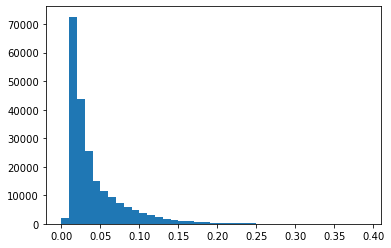

In [25]:
plot_queries(qs)

##### Poda 200

In [26]:
_=inv_idx.compute_plists(200)
print(f"Longitud de posting list 'amlo'= {len(inv_idx.postlists[process_line('amlo')[0]])}")

** Computing Posting lists with poda200 ...
2020-05-11 02:52:13.788327 :: 2.8e-05 - Processing item #0 
poda200_plist.pickle written.
** Computed Posting lists with poda200 !!!
Longitud de posting list 'amlo'= 189


In [27]:
%%time
for q in queries:
    _=inv_idx.o(q)

CPU times: user 227 ms, sys: 0 ns, total: 227 ms
Wall time: 234 ms


Preprocessed 107691 of 999000 docs pairs.


2020-05-11 02:52:14.951747 :: 0.143142 - Processing item #0 
	Query 0 of 1000 with 34 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:15.430029 :: 0.478282 - Processing item #100 
	Query 100 of 1000 with 48 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:15.882287 :: 0.452258 - Processing item #200 
	Query 200 of 1000 with 252 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:16.310360 :: 0.428073 - Processing item #300 
	Query 300 of 1000 with 114 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:16.783555 :: 0.473195 - Processing item #400 
	Query 400 of 1000 with 147 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:17.206999 :: 0.423444 - Processing item #500 
	Query 500 of 1000 with 240 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:17.682866 :: 0.475867 - Processing item #600 
	Query 600 of 1000 with 323 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 0

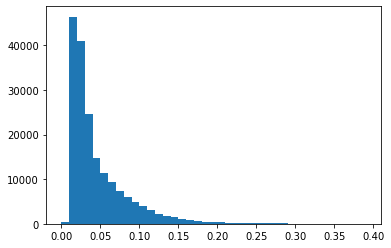

In [28]:
plot_queries(qs)

##### Poda 150

In [29]:
_=inv_idx.compute_plists(150)
print(f"Longitud de posting list 'amlo'= {len(inv_idx.postlists[process_line('amlo')[0]])}")

** Computing Posting lists with poda150 ...
2020-05-11 02:52:20.275859 :: 2.3e-05 - Processing item #0 
poda150_plist.pickle written.
** Computed Posting lists with poda150 !!!
Longitud de posting list 'amlo'= 150


In [30]:
%%time
for q in queries:
    _=inv_idx.o(q)

CPU times: user 175 ms, sys: 0 ns, total: 175 ms
Wall time: 176 ms


Preprocessed 107691 of 999000 docs pairs.


2020-05-11 02:52:21.214041 :: 0.154204 - Processing item #0 
	Query 0 of 1000 with 34 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:21.957140 :: 0.743099 - Processing item #100 
	Query 100 of 1000 with 48 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:22.567186 :: 0.610046 - Processing item #200 
	Query 200 of 1000 with 217 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:23.001058 :: 0.433872 - Processing item #300 
	Query 300 of 1000 with 114 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:23.462166 :: 0.461108 - Processing item #400 
	Query 400 of 1000 with 147 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:23.893936 :: 0.43177 - Processing item #500 
	Query 500 of 1000 with 240 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:24.396123 :: 0.502187 - Processing item #600 
	Query 600 of 1000 with 278 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02

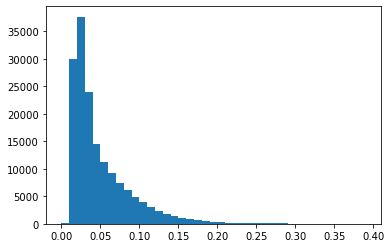

In [31]:
plot_queries(qs)

##### Poda 100

In [32]:
_=inv_idx.compute_plists(100)
print(f"Longitud de posting list 'amlo'= {len(inv_idx.postlists[process_line('amlo')[0]])}")

** Computing Posting lists with poda100 ...
2020-05-11 02:52:26.810967 :: 2.4e-05 - Processing item #0 
poda100_plist.pickle written.
** Computed Posting lists with poda100 !!!
Longitud de posting list 'amlo'= 100


In [33]:
%%time
for q in queries:
    _=inv_idx.o(q)

CPU times: user 216 ms, sys: 0 ns, total: 216 ms
Wall time: 220 ms


Preprocessed 107691 of 999000 docs pairs.


2020-05-11 02:52:28.251768 :: 0.16884 - Processing item #0 
	Query 0 of 1000 with 34 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:28.656552 :: 0.404784 - Processing item #100 
	Query 100 of 1000 with 48 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:29.031179 :: 0.374627 - Processing item #200 
	Query 200 of 1000 with 177 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:29.531064 :: 0.499885 - Processing item #300 
	Query 300 of 1000 with 114 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:29.923143 :: 0.392079 - Processing item #400 
	Query 400 of 1000 with 104 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:30.257099 :: 0.333956 - Processing item #500 
	Query 500 of 1000 with 204 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:30.601635 :: 0.344536 - Processing item #600 
	Query 600 of 1000 with 215 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02

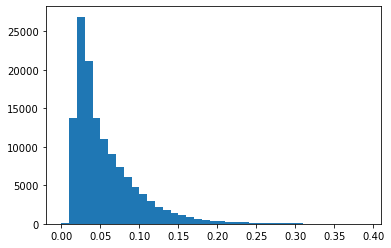

In [34]:
plot_queries(qs)

##### Poda 50

In [35]:
_=inv_idx.compute_plists(50)
print(f"Longitud de posting list 'amlo'= {len(inv_idx.postlists[process_line('amlo')[0]])}")

** Computing Posting lists with poda50 ...
2020-05-11 02:52:32.464275 :: 2.6e-05 - Processing item #0 
poda50_plist.pickle written.
** Computed Posting lists with poda50 !!!
Longitud de posting list 'amlo'= 50


In [36]:
%%time
for q in queries:
    _=inv_idx.o(q)

CPU times: user 125 ms, sys: 115 µs, total: 125 ms
Wall time: 126 ms


Preprocessed 107691 of 999000 docs pairs.


2020-05-11 02:52:33.528531 :: 0.13918 - Processing item #0 
	Query 0 of 1000 with 34 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:33.775343 :: 0.246812 - Processing item #100 
	Query 100 of 1000 with 48 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:34.012352 :: 0.237009 - Processing item #200 
	Query 200 of 1000 with 136 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:34.242834 :: 0.230482 - Processing item #300 
	Query 300 of 1000 with 114 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:34.503292 :: 0.260458 - Processing item #400 
	Query 400 of 1000 with 54 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:34.745861 :: 0.242569 - Processing item #500 
	Query 500 of 1000 with 138 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:52:34.992239 :: 0.246378 - Processing item #600 
	Query 600 of 1000 with 125 results. Preprocessed 107691 of 999000 docs pairs.
2020-05-11 02:

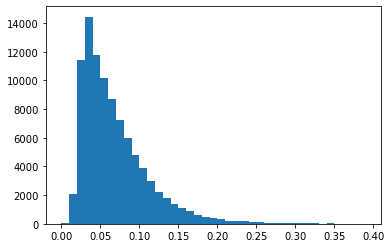

In [37]:
plot_queries(qs)

Se listan todos los archivos .pickle. Se puede notar el tamaño para cada uno que corresponde para una longitud de poda.

In [38]:
!ls -lh *.pickle

-rw-r--r-- 1 jovyan users 148K May 11 02:51 poda0_mtx.pickle
-rw-r--r-- 1 jovyan users 650K May 11 02:51 poda0_plist.pickle
-rw-r--r-- 1 jovyan users 626K May 11 02:52 poda100_plist.pickle
-rw-r--r-- 1 jovyan users 637K May 11 02:52 poda150_plist.pickle
-rw-r--r-- 1 jovyan users 643K May 11 02:52 poda200_plist.pickle
-rw-r--r-- 1 jovyan users 611K May 11 02:52 poda50_plist.pickle
-rw-r--r-- 1 jovyan users 146K May 11 02:51 tokenized_docs.pickle


# Conclusiones
* Uno de los principales retos al desarrollar esta actividad fue encontrar soluciones que mejoraran el desempeño. Sobre todo del cálculo de la similitud coseno de tantos documentos y considerando tantas consultas. Se calculó que las implementaciones iniciales tadrarían cerca de 20 horas para procesar los datos necesarios para graficar los histogramas solicitados. Se diagnosticó con el uso del `line_profiler` y `%lprun` los statements que consumían más tiempo de procesamiento, lo cual llevó a evitar el uso masivo de la conversión de una matriz o vector disperso en uno denso (método `todense()`). Derivado de lo anterior las principales optimizaciones hechas son las siguientes:
    * Representar el vector BOW de manera simplificada, en vez de ser un vector disperso con muchos ceros.
    * Preprocesar dichas representaciones simplificadas. Para procesarlas una sola vez.
    * Se notó que el acceso a una lista de numpy arrays es mucho más eficiente que a una lista de listas. Se uso esa estructura para almacenar los objetos críticos.
    * Procesar el producto punto entre dos documentos solamente una vez. Para ello se calcula la primera vez y se almacena para que la segunda vez que se requiera solo se recupera desde memoria.
* Es de notarse que las consultas son más rápidas cuando se realiza poda, como era de esperarse. Conforme la longitud de poda es menor también es menor el tiempo requerido para realizar las consultas.<br>Las diferentes longitudes de poda no muestran un impacto significativo en esta medición. Esto puede deberse a la amplia diferencia en la longitud con las listas de posteo originales (por ejemplo 19,321 elementos en lista de _"amlo"_ ).
* El tamaño de las longitud de poda de las listas de posteo es directamente proporcional a la cantidad de memoria requerida. Menor longitud, menor tamaño. 
* Las similitudes entre los documentos de consulta y sus resultados tienden a alejarse de 0 conforme la longitud de poda decrece, según se puede apreciar en los histogramas para cada caso. Además en todos los casos se mantiene una distribución con incidencias concentradas cerca de un valor central y que decrecen conforme se alejan de ese valor.

# Referencias

	[1]	“Inverted Index - ML Wiki,” Mlwiki.org, 2017. [Online]. Available: http://mlwiki.org/index.php/Inverted_Index. [Accessed: 18-Apr-2020].<br>
	[2]	“sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.22.2 documentation,” Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html. [Accessed: 18-Apr-2020].<br>
	[3]	“Sparse matrices (scipy.sparse) — SciPy v1.4.1 Reference Guide,” Scipy.org, 2019. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/sparse.html. [Accessed: 18-Apr-2020].<br>
	[4]	Mausam, “Document Similarity in Information Retrieval.” [Online]. Available: https://courses.cs.washington.edu/courses/cse573/12sp/lectures/17-ir.pdf.<br>
	[5]	“sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.22.2 documentation,” Scikit-learn.org, 2011. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer. [Accessed: 18-Apr-2020].